# Pathway analysis

In [1]:
import scanpy as sc
import decoupler as dc

# Only needed for processing
import numpy as np
import pandas as pd

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
comparison = 'young.vs.old'
experiment = "RNAseq_abundances_adjusted_combat_inmose"


In [3]:
dds = pd.read_csv(f'/home/amore/work/data/{experiment}_{comparison}_DDS.csv',index_col=0)
dds

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,6.652061e+07,-0.039065,0.104623,-0.373394,0.708855,0.907432
TNMD,1.376112e+05,-0.426688,1.395668,-0.305723,0.759815,0.924157
DPM1,9.614235e+07,-0.145930,0.158111,-0.922960,0.356028,0.693475
SCYL3,1.268802e+07,-1.493229,0.706095,-2.114769,0.034450,0.158123
FIRRM,3.481744e+07,-1.009579,0.447366,-2.256718,0.024026,0.123501
...,...,...,...,...,...,...
C4orf36.1,5.664924e+07,-0.351695,0.220923,-1.591932,0.111400,0.346605
Unnamed: 34327,5.890034e+05,-0.088741,1.216048,-0.072975,0.941826,0.982119
H2BK1,9.477206e+05,0.010106,1.014972,0.009957,0.992056,0.997164
Unnamed: 34332,5.902246e+06,1.001606,0.743051,1.347965,0.177670,0.466165


In [4]:
results_df =dds

In [5]:
### get elbow point
elbow = 3

dds_de = dds[(abs(dds['log2FoldChange'])>elbow) & (dds['padj']<0.01)]
dds_de

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
SEMA3F,1.720695e+06,-4.102241,0.772582,-5.309781,1.097573e-07,3.923129e-06
CFTR,1.715479e+06,-3.346279,0.888963,-3.764250,1.670498e-04,2.384172e-03
MYH16,7.060173e+04,7.573264,0.787617,9.615413,6.883250e-22,2.130282e-19
ARF5,5.221438e+05,-4.739374,0.841104,-5.634707,1.753562e-08,7.719199e-07
FKBP4,8.184785e+06,-3.040114,0.762104,-3.989105,6.632305e-05,1.078940e-03
...,...,...,...,...,...,...
Unnamed: 34110,2.573404e+05,-3.675228,0.883758,-4.158635,3.201546e-05,5.906640e-04
C2orf81,1.965189e+04,-3.319408,0.746568,-4.446224,8.739267e-06,1.930245e-04
Unnamed: 34127,8.246822e+05,-4.548194,0.812726,-5.596217,2.190797e-08,9.391561e-07
Unnamed: 34260,2.311775e+06,-3.038266,0.760715,-3.993960,6.497871e-05,1.062519e-03


In [6]:
dds_de.loc[['FLT3']]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
FLT3,73416.724917,-4.438556,0.811457,-5.469859,4.503926e-08,0.000002


## Get msigdb

In [7]:
msigdb = dc.get_resource('MSigDB')
msigdb# Sort the results by the ranking metric (e.g., log2 fold change)


,genesymbol,collection,geneset
0,MAFF,chemical_and_genetic_perturbations,BOYAULT_LIVER_CANCER_SUBCLASS_G56_DN
1,MAFF,chemical_and_genetic_perturbations,ELVIDGE_HYPOXIA_UP
2,MAFF,chemical_and_genetic_perturbations,NUYTTEN_NIPP1_TARGETS_DN
3,MAFF,immunesigdb,GSE17721_POLYIC_VS_GARDIQUIMOD_4H_BMDC_DN
4,MAFF,chemical_and_genetic_perturbations,SCHAEFFER_PROSTATE_DEVELOPMENT_12HR_UP
...,...,...,...
3838543,PRAMEF22,go_biological_process,GOBP_POSITIVE_REGULATION_OF_CELL_POPULATION_PR...
3838544,PRAMEF22,go_biological_process,GOBP_APOPTOTIC_PROCESS
3838545,PRAMEF22,go_biological_process,GOBP_REGULATION_OF_CELL_DEATH
3838546,PRAMEF22,go_biological_process,GOBP_NEGATIVE_REGULATION_OF_DEVELOPMENTAL_PROCESS


In [8]:
# Filter by hallmark
#msigdb = msigdb[msigdb['collection']=='hallmark']

# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]

# Rename
#msigdb.loc[:, 'geneset'] = [name.split('HALLMARK_')[1] for name in msigdb['geneset']]

msigdb

,genesymbol,collection,geneset
0,MAFF,chemical_and_genetic_perturbations,BOYAULT_LIVER_CANCER_SUBCLASS_G56_DN
1,MAFF,chemical_and_genetic_perturbations,ELVIDGE_HYPOXIA_UP
2,MAFF,chemical_and_genetic_perturbations,NUYTTEN_NIPP1_TARGETS_DN
3,MAFF,immunesigdb,GSE17721_POLYIC_VS_GARDIQUIMOD_4H_BMDC_DN
4,MAFF,chemical_and_genetic_perturbations,SCHAEFFER_PROSTATE_DEVELOPMENT_12HR_UP
...,...,...,...
3838543,PRAMEF22,go_biological_process,GOBP_POSITIVE_REGULATION_OF_CELL_POPULATION_PR...
3838544,PRAMEF22,go_biological_process,GOBP_APOPTOTIC_PROCESS
3838545,PRAMEF22,go_biological_process,GOBP_REGULATION_OF_CELL_DEATH
3838546,PRAMEF22,go_biological_process,GOBP_NEGATIVE_REGULATION_OF_DEVELOPMENTAL_PROCESS


In [20]:
set(msigdb["collection"])

{'biocarta_pathways',
 'cancer_gene_neighborhoods',
 'cancer_modules',
 'cell_type_signatures',
 'chemical_and_genetic_perturbations',
 'go_biological_process',
 'go_cellular_component',
 'go_molecular_function',
 'hallmark',
 'human_phenotype_ontology',
 'immunesigdb',
 'kegg_pathways',
 'mirna_targets_legacy',
 'mirna_targets_mirdb',
 'oncogenic_signatures',
 'pid_pathways',
 'positional',
 'reactome_pathways',
 'tf_targets_gtrf',
 'tf_targets_legacy',
 'vaccine_response',
 'wikipathways'}

## GSEA

In [10]:
# Prepare the ranking for GSEA
ranked_genes = results_df[['log2FoldChange']].sort_values(by='log2FoldChange', ascending=False)

# Prepare the ranking for GSEA
gene_list = ranked_genes['log2FoldChange']
gene_list.index = results_df.index  # Ensure the gene symbols are in the index
pd.DataFrame(gene_list)

,log2FoldChange
TSPAN6,14.788157
TNMD,14.022549
DPM1,12.880724
SCYL3,11.580810
FIRRM,10.561955
...,...
C4orf36.1,-16.905359
Unnamed: 34327,-16.950502
H2BK1,-19.692881
Unnamed: 34332,-19.817974


In [ ]:

# Run GSEA
enr_gsea = dc.get_gsea_df(
    df=dds,
    stat="stat",
    net=msigdb,
    source='geneset',
    target='genesymbol'
)

# Display the top enrichment results
enr_gsea.head()

In [ ]:
significant_GSEA = enr_gsea[enr_gsea["FDR p-value"] < 0.1].sort_values(by="NES")
significant_GSEA

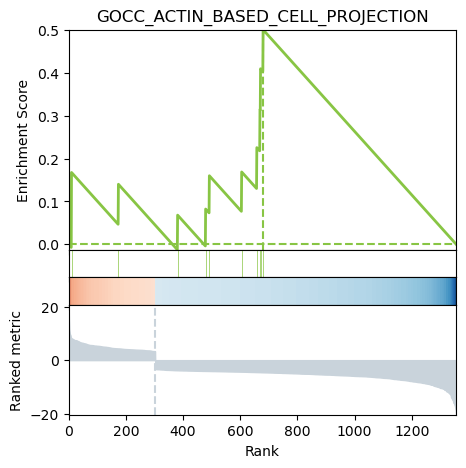

In [13]:
# Plot
dc.plot_running_score(
    df=dds_de,
    stat='stat',
    net=msigdb,
    source='geneset',
    target='genesymbol',
    set_name='GOCC_ACTIN_BASED_CELL_PROJECTION'
)

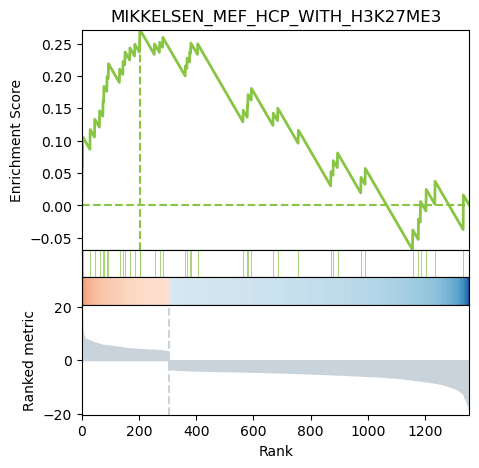

In [14]:
# Plot
dc.plot_running_score(
    df=dds_de,
    stat='stat',
    net=msigdb,
    source='geneset',
    target='genesymbol',
    set_name='MIKKELSEN_MEF_HCP_WITH_H3K27ME3'
)

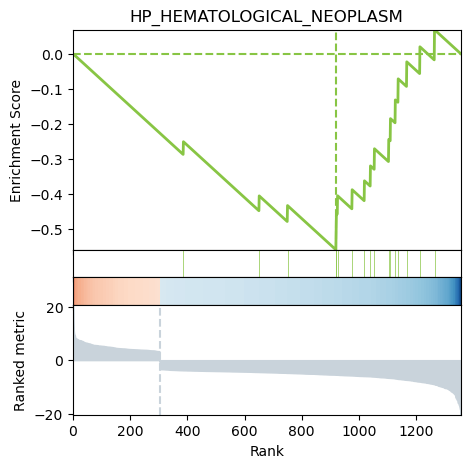

In [15]:
# Plot
dc.plot_running_score(
    df=dds_de,
    stat='stat',
    net=msigdb,
    source='geneset',
    target='genesymbol',
    set_name='HP_HEMATOLOGICAL_NEOPLASM'
)

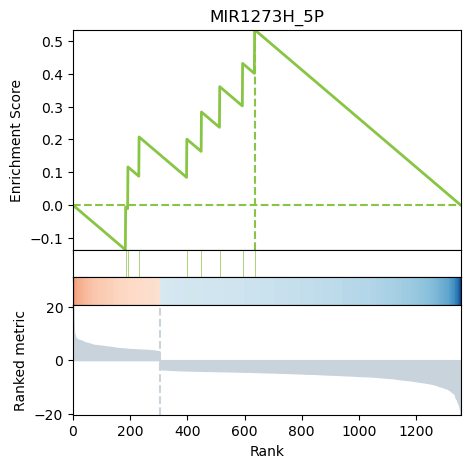

In [16]:
# Plot
dc.plot_running_score(
    df=dds_de,
    stat='stat',
    net=msigdb,
    source='geneset',
    target='genesymbol',
    set_name='MIR1273H_5P'
)

## ORA

In [17]:
# Infer enrichment with ora using significant deg
top_genes = results_df[results_df['padj'] < 0.05]

# Run ora
enr_pvals = dc.get_ora_df(
    df=top_genes,
    net=msigdb,
    source='geneset',
    target='genesymbol'
)

enr_pvals.head()

,Term,Set size,Overlap ratio,p-value,FDR p-value,Odds ratio,Combined score,Features
0,AAACCAC_MIR140,110,0.145455,0.845018,1.0,0.839123,0.141306,BAZ2B;C1orf21;DTNA;EYA2;GYS1;HNRNPH3;KATNBL1;M...
1,AAAGACA_MIR511,204,0.191176,0.334298,1.0,1.087381,1.191467,AGBL3;ATRX;BTG1;BUB3;C1orf21;CAMK2N1;CCNT2;CEP...
2,AAAGGAT_MIR501,127,0.212598,0.179120,1.0,1.214805,2.089099,BCL6;BCLAF1;CELF2;CHODL;CLK1;ERRFI1;H2AX;HOXB8...
3,AAAGGGA_MIR204_MIR211,224,0.156250,0.824404,1.0,0.888295,0.171525,ANKRD13A;AP1S1;ARHGAP29;CCNT2;CCPG1;CHD5;DCAF5...
4,AAANWWTGC_UNKNOWN,194,0.195876,0.280094,1.0,1.114589,1.418461,ANK3;BCL6;BNC2;CACNG3;CDC42EP3;CHD2;DCHS2;DDIT...


In [21]:
significant_ORA = enr_pvals[(enr_pvals["p-value"] < 0.05) & (enr_pvals["FDR p-value"] < 0.05)]
significant_ORA

,Term,Set size,Overlap ratio,p-value,FDR p-value,Odds ratio,Combined score,Features
864,BUSSLINGER_GASTRIC_PARIETAL_CELLS,251,0.290837,6.606183e-06,3.711474e-03,1.657350,19.768054,ALDH1A1;ATP5F1A;ATP5F1C;ATP5F1D;ATP5MC1;ATP5MC...
1785,ERWIN_COHEN_BLOOD_LIVE_VACCINE_TC_83_AGE_23_48...,682,0.250733,7.397987e-07,6.178319e-04,1.434301,20.247869,ADD3;AGPAT5;AKAP7;ALG13;ANK3;ANKRD36B;ATAD1;AT...
2620,GOBP_AEROBIC_RESPIRATION,194,0.412371,1.445322e-14,1.116511e-10,2.358667,75.165683,ADSL;ATP5F1A;ATP5F1C;ATP5F1D;ATP5F1E;ATP5ME;AT...
2776,GOBP_ATP_BIOSYNTHETIC_PROCESS,103,0.446602,2.331391e-10,4.237646e-07,2.547217,56.495699,ALDOA;ATP5F1A;ATP5F1C;ATP5F1D;ATP5F1E;ATP5MC1;...
2777,GOBP_ATP_METABOLIC_PROCESS,216,0.300926,6.121450e-06,3.581594e-03,1.714829,20.584313,AK2;ALDOA;ATP5F1A;ATP5F1C;ATP5F1D;ATP5F1E;ATP5...
...,...,...,...,...,...,...,...,...
29655,WP_ELECTRON_TRANSPORT_CHAIN_OXPHOS_SYSTEM_IN_M...,103,0.553398,8.860742e-18,2.737969e-13,3.159687,124.064817,ATP5F1A;ATP5F1C;ATP5F1D;ATP5F1E;ATP5MC1;ATP5MC...
29894,WP_MITOCHONDRIAL_COMPLEX_IV_ASSEMBLY,34,0.500000,1.810271e-05,8.605748e-03,2.862211,31.253771,CMC1;COA3;COX17;COX4I1;COX5B;COX6B1;COX6C;COX7...
29895,WP_MITOCHONDRIAL_COMPLEX_I_ASSEMBLY_MODEL_OXPH...,56,0.428571,1.089074e-05,5.755690e-03,2.448959,27.985722,DMAC1;MT-ND1;MT-ND2;MT-ND4;MT-ND4L;MT-ND5;MT-N...
29939,WP_NONALCOHOLIC_FATTY_LIVER_DISEASE,154,0.324675,7.115950e-06,3.926479e-03,1.850533,21.934687,ATF4;COX4I1;COX5B;COX6B1;COX6C;COX7A2;COX7C;CY...


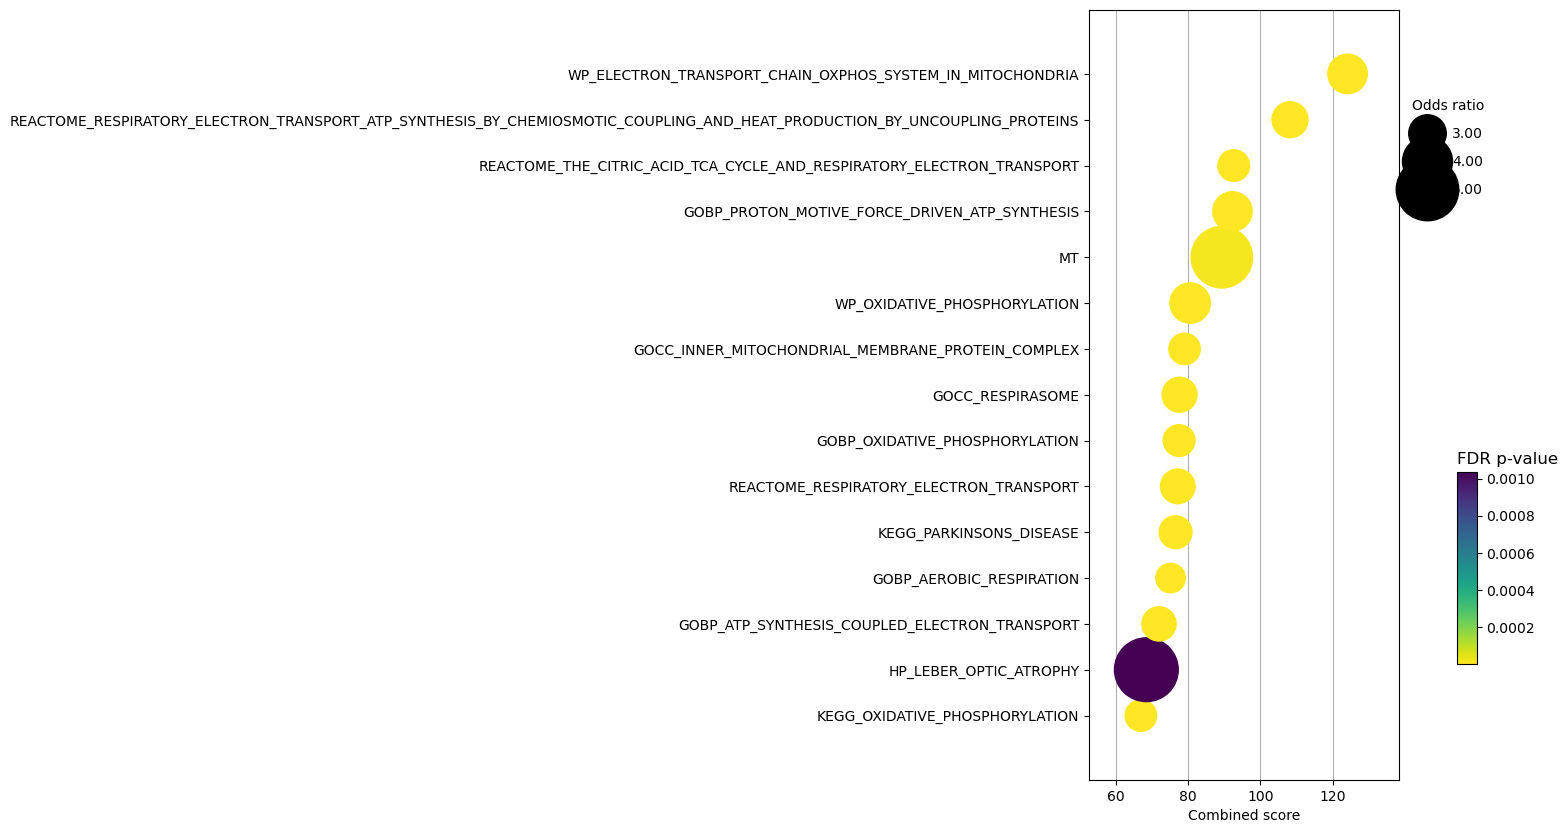

In [19]:
dc.plot_dotplot(
    enr_pvals.sort_values('Combined score', ascending=False).head(15),
    x='Combined score',
    y='Term',
    s='Odds ratio',
    c='FDR p-value',
    scale=1.5,
    figsize=(5, 10)
)

### GSEA vs ORA

In [28]:
enr_gsea[enr_gsea['Term'].isin(significant_ORA['Term'])]

,Term,ES,NES,NOM p-value,FDR p-value,Set size,Tag %,Rank %,Leading edge
281,BUSSLINGER_GASTRIC_PARIETAL_CELLS,0.400741,1.182834,0.235127,0.987790,6,1.000000,0.601032,NDUFA4;CHCHD2;UQCR11;PRDX5;ALDH1A1;NDUFB4
705,ERWIN_COHEN_BLOOD_LIVE_VACCINE_TC_83_AGE_23_48...,-0.281765,-1.082365,0.367056,0.987790,18,0.888889,0.643805,JCHAIN;SLAMF7;CD69;IGHG1;EIF1AX;OASL;FAM169A;R...
963,GOBP_AEROBIC_RESPIRATION,0.239970,0.862095,0.657534,0.987790,10,1.000000,0.761799,NDUFA4;CHCHD2;RHOA;SIRT3;PDE12;DHTKD1;UQCR11;M...
1001,GOBP_ATP_METABOLIC_PROCESS,0.306440,0.803918,0.727520,0.987790,5,1.000000,0.694690,VPS9D1;FOXK1;DHTKD1;TAFAZZIN;NDUFB4
1002,GOBP_ATP_SYNTHESIS_COUPLED_ELECTRON_TRANSPORT,0.395263,1.057910,0.363388,0.987790,5,1.000000,0.606195,NDUFA4;CHCHD2;UQCR11;TAFAZZIN;NDUFB4
1062,GOBP_CELLULAR_RESPIRATION,0.240149,0.912793,0.548611,0.987790,11,1.000000,0.761799,NDUFA4;CHCHD2;RHOA;IFNLR1;SIRT3;PDE12;DHTKD1;U...
1211,GOBP_ELECTRON_TRANSPORT_CHAIN,0.396142,1.326630,0.139394,0.987790,8,1.000000,0.606195,NDUFA4;CHCHD2;CYP19A1;DEGS1;AKR1C4;UQCR11;TAFA...
1228,GOBP_ENERGY_DERIVATION_BY_OXIDATION_OF_ORGANIC...,0.243416,1.087207,0.324528,0.987790,15,0.266667,0.129794,IFNLR1;PDE12;KL;NDUFB4
1268,GOBP_GENERATION_OF_PRECURSOR_METABOLITES_AND_E...,0.178881,0.961974,0.520179,0.987790,21,0.238095,0.129794,CYP19A1;IFNLR1;PDE12;KL;NDUFB4
1593,GOBP_NUCLEOSIDE_PHOSPHATE_BIOSYNTHETIC_PROCESS,0.229970,0.791851,0.725076,0.987790,8,1.000000,0.771386,VPS9D1;PPCDC;ADCY10;AMPD2;PANK4;PARP10;TAFAZZI...
